In [137]:
using ScikitLearn
using Statistics
using Plots
using Images

In [138]:
@sk_import linear_model: LogisticRegression;
@sk_import model_selection: train_test_split;
@sk_import preprocessing: StandardScaler;
@sk_import utils: check_random_state;
@sk_import datasets: fetch_openml

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore /Users/camillezaug/.julia/packages/ScikitLearn/bo2Pt/src/Skcore.jl:140


PyObject <function fetch_openml at 0x1a6a7734d0>

In [139]:
train_samples = 5000
X, y = fetch_openml("mnist_784", version=1, return_X_y=true)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], PyCall.PyObject[PyObject '5', PyObject '0', PyObject '4', PyObject '1', PyObject '9', PyObject '2', PyObject '1', PyObject '3', PyObject '1', PyObject '4'  …  PyObject '7', PyObject '8', PyObject '9', PyObject '0', PyObject '1', PyObject '2', PyObject '3', PyObject '4', PyObject '5', PyObject '6'])

In [140]:
random_state = check_random_state(0)
permutation = random_state.permutation(size(X)[1]).+1; # Adding a 1 because this is a python function that is meant to act as indices in Julia

In [141]:
size(X)
X1 = X[permutation]
y1 = y[permutation]
X2 = reshape(X1,(size(X1)[1],:));
#X = X.reshape((X.shape[0], -1))

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=10000)

4-element Array{Array,1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]                       
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]                       
 ["7", "2", "7", "5", "6", "5", "5", "4", "7", "7"  …  "4", "8", "9", "6", "5", "2", "0", "1", "2", "3"]
 ["9", "4", "7", "4", "6", "3", "6", "4", "8", "5"  …  "0", "3", "2", "2", "0", "9", "8", "1", "0", "0"]

In [143]:
scaler = StandardScaler();
X_train = scaler.fit_transform(X_train);
X_test = scaler.transform(X_test);

In [148]:
clf = LogisticRegression(C=50. / train_samples, penalty="l1", solver="saga", tol=0.5);

In [153]:
clf.fit(X_train, y_train)
sparsity = mean(clf.coef_) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
println("Sparsity with L1 penalty:",sparsity)
println("Test score with L1 penalty",score)

Sparsity with L1 penalty:0.08132052390243581
Test score with L1 penalty0.8168


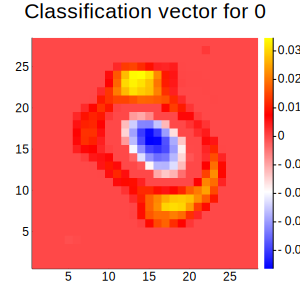

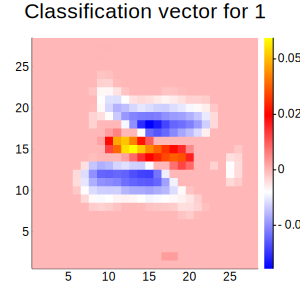

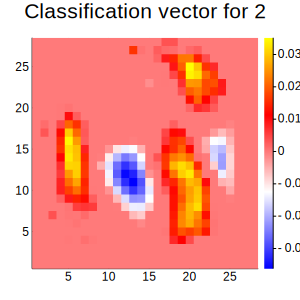

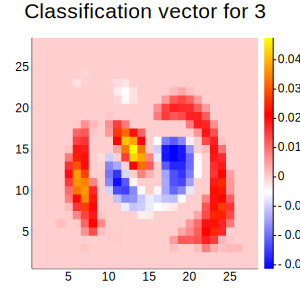

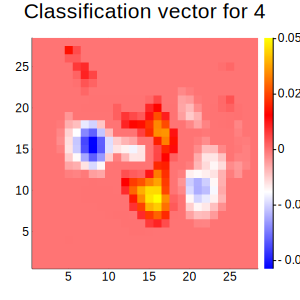

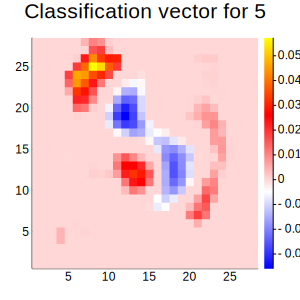

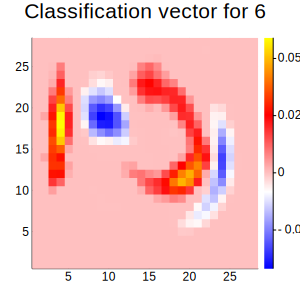

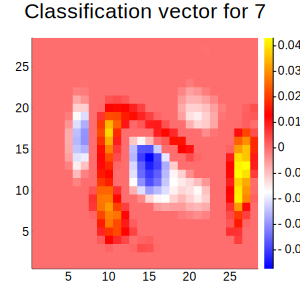

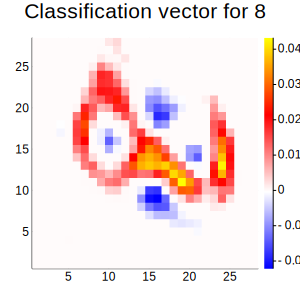

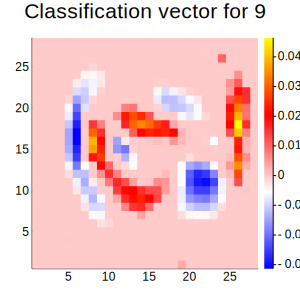

(10, 784)


In [157]:
coef2 = clf.coef_
scale = maximum(abs.(coef2))
println(size(coef2))

for k in collect(1:10)

    i = reshape(coef2[k,:],(28,28))

    x = display(heatmap(1:size(i,1),
        1:size(i,2), i,
        c=cgrad([:blue, :white,:red, :yellow]),
        title=string("Classification vector for ",k-1),
        size= (300,300)))

end

In [161]:
@sk_import linear_model: Ridge;

In [163]:
clf2 = Ridge(tol=0.5);

In [166]:
clf2.fit(X_train, y_train)
sparsity = mean(clf2.coef_) * 100
# score = clf2.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
println("Sparsity with L1 penalty:",sparsity)
println("Test score with L1 penalty",score)

Sparsity with L1 penalty:0.5129058427754898
Test score with L1 penalty0.8168


In [170]:
coef3 = clf2.coef_

display(coef3)
scale = maximum(abs.(coef3))
println(size(coef3))

for k in collect(1:10)

    i = reshape(coef3[k,:],(28,28))

    x = display(heatmap(1:size(i,1),
        1:size(i,2), i,
        c=cgrad([:blue, :white,:red, :yellow]),
        title=string("Classification vector for ",k-1),
        size= (300,300)))

end

784-element Array{Float64,1}:
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  ⋮                     
  0.00103507615662798   
 -0.00025323097729523016
 -0.04875344639460396   
  0.06351462955271388   
 -0.07282740879518187   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   

(784,)


DimensionMismatch: DimensionMismatch("new dimensions (28, 28) must be consistent with array size 1")